# Banking Dataset

Aujourd'hui j'ai décidé de travaillé avec un dataset d'obtention de prêt.

### Import de tout les outils

In [727]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

### Récuperation du dataset qui ce trouve à la racine 

In [773]:
#df_test=pd.read_csv('test.csv', sep=';')
df_train=pd.read_csv('train.csv', sep=';')
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [774]:
df_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [729]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Description des colonnes:
 - **age**: âge du client (numérique)
 - **job** : type d'emploi (catégorie: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")(string)
 - **marital** : Statut familiale (catégorie: "divorced","married","single")(string)
 - **education**: niveau d'étude (catégorie: "primary","secondary","tertiary,"unknown")(string)
 - **default**: le client a déjà des crédit en cours (categorical: "no","yes")
 - **balance** :compte en banque (numérique)
 - **housing**: Pret immobilier? (catégorie: "no","yes")
 - **loan**: Pret personnel ? (catégorie: "no","yes")
 - **contact**: le type de communication (catégorie: "cellular","telephone")(string)
 - **month**: dernier mois de contact (catégorie: "jan", "feb", "mar", ..., "nov", "dec")(string)
 - **day**: dernier jour de contact (catégorie: "mon","tue","wed","thu","fri")(string)
 - **duration**: durée de l'appel, en seconde (numérique). 
 - **campaign**: nombre de contact avec le clien lors de cette campagne(numérique)
 - **pdays**: nombre de jours qui se sont écoulés après que le client a été contacté pour la dernière fois(numérique)
 - **previous**: nombre de contacts réalisés avant cette campagne et pour ce client (numérique)
 - **poutcome**: résultat de la campagne marketing précédente (catégorie: "failure","unknown","other","success")

Variable y colonne à prédire:
 - **y** :  Le client a-t-il obtenu un prêt? (binaire: "yes","no")

### Verifiration des NAN

In [730]:
df_train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Il n'y a aucun traitement à faire car il n'y a aucun champs vide 
**-- NICE --**

### Vérification de la répartition des prêt obtunu et non obtenu 

In [731]:
df_train['y'].value_counts()*100/len(df_train)

no     88.30152
yes    11.69848
Name: y, dtype: float64

#### Premierement on ne rééquilibre pas le nombre de oui et de non pour le dataset
Après avoir tester le model san sle rééquilibrage on a une bonne performance mais grace a la matrice de confusion on voit qu'il y a beaucoup de faux negatif et de faux positif

In [732]:
train=df_train

#### Alors on decide de rééquilibrer 
La performance sera un peu moins bonne mais il y aura moins de faux negatifs - faux possitifs

In [733]:
df_train['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [734]:
y_no=df_train[df_train["y"] == 'no'].sample(5289) 
y_yes=df_train[df_train["y"] == 'yes'].sample(5289)

In [735]:
train=y_no.merge(y_yes, how='outer')
train['y'].value_counts()

no     5289
yes    5289
Name: y, dtype: int64

#### On numérise la colonne on remplace no par 0 et yes par 1

In [736]:
train['y']=train['y'].map({'no':0,"yes":1})
train['y']

0        0
1        0
2        0
3        0
4        0
        ..
10573    1
10574    1
10575    1
10576    1
10577    1
Name: y, Length: 10578, dtype: int64

In [737]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,24,blue-collar,married,secondary,no,142,yes,yes,unknown,16,may,300,1,-1,0,unknown,0
1,30,management,single,tertiary,no,2,yes,no,cellular,28,jul,377,4,-1,0,unknown,0
2,46,blue-collar,married,primary,no,0,yes,no,unknown,14,may,73,1,-1,0,unknown,0
3,45,services,married,primary,no,7811,no,no,unknown,16,jun,143,2,-1,0,unknown,0
4,21,blue-collar,single,secondary,no,2265,no,no,cellular,27,may,156,4,99,2,success,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,78,retired,married,tertiary,no,1204,no,no,telephone,17,nov,135,1,-1,0,unknown,1
10574,51,housemaid,married,unknown,no,2337,yes,no,cellular,16,apr,251,2,266,3,other,1
10575,32,management,single,tertiary,no,0,no,no,cellular,5,feb,550,4,-1,0,unknown,1
10576,27,self-employed,single,tertiary,no,347,no,no,cellular,6,aug,385,4,-1,0,unknown,1


### Colonne job

In [738]:
df_train['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [739]:
# On normalize les jobs
# blue-collar      ==>1
# management       ==>2
# technician       ==>3
# admin.           ==>4
# services         ==>5
# retired          ==>6
# self-employed    ==>7
# entrepreneur     ==>8
# unemployed       ==>9
# housemaid        ==>10
# student          ==>11
# unknown          ==>0
train['job']=train['job'].map({'unknown':0,"blue-collar":1,'management':2,'technician':3,'admin.':4,'services':5,'retired':6,'self-employed':7,'entrepreneur':8,'unemployed':9,'housemaid':10,'student':11})

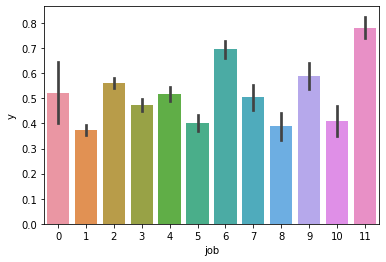

In [740]:
sns.barplot(x="job", y="y", data=train)

### Colonne marital

In [741]:
train['marital'].value_counts()

married     5970
single      3361
divorced    1247
Name: marital, dtype: int64

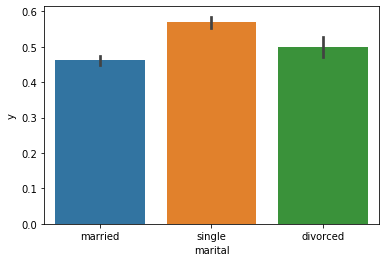

In [742]:
sns.barplot(x="marital", y="y", data=train)

In [743]:
train['marital']=train['marital'].map({'married':0,"single":1,'divorced':2})

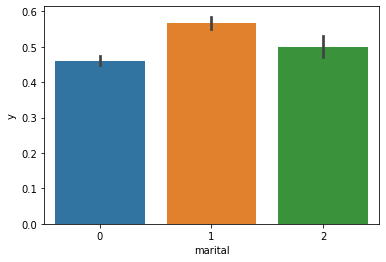

In [744]:
sns.barplot(x="marital", y="y", data=train)

### Colonne education

In [745]:
train['education'].value_counts()

secondary    5215
tertiary     3442
primary      1445
unknown       476
Name: education, dtype: int64

In [746]:
train['education']=train['education'].map({'secondary':0,"tertiary":1,'primary':2,'unknown':3})

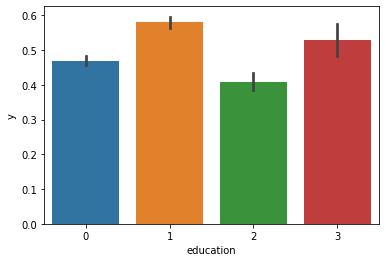

In [747]:
sns.barplot(x="education", y="y", data=train)

### Colonne default

In [748]:
train['default'].value_counts()

no     10423
yes      155
Name: default, dtype: int64

In [749]:
train['default']=train['default'].map({'no':0,'yes':1})

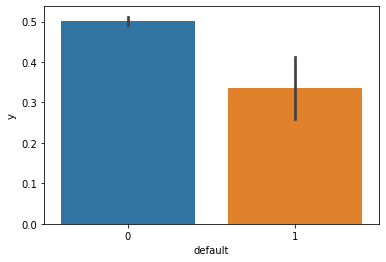

In [750]:
sns.barplot(x="default", y="y", data=train)

### Colonne housing

In [751]:
train['housing'].value_counts()

no     5558
yes    5020
Name: housing, dtype: int64

In [752]:
train['housing']=train['housing'].map({'no':0,"yes":1})

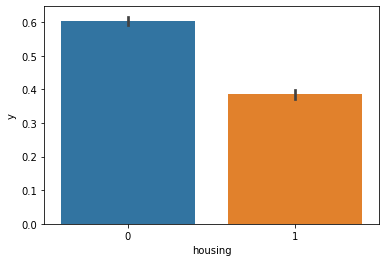

In [753]:
sns.barplot(x="housing", y="y", data=train)

### Colonne balance 

In [754]:
train[train['y']==1]['balance'].mean()

1804.2679145396105

In [755]:
train[train['y']==0]['balance'].mean()

1315.676687464549

In [756]:
## range de la balance 
pd.qcut(train['balance'], 5)

0            (62.0, 347.0]
1        (-6847.001, 62.0]
2        (-6847.001, 62.0]
3        (2261.0, 81204.0]
4        (2261.0, 81204.0]
               ...        
10573      (870.0, 2261.0]
10574    (2261.0, 81204.0]
10575    (-6847.001, 62.0]
10576        (62.0, 347.0]
10577      (870.0, 2261.0]
Name: balance, Length: 10578, dtype: category
Categories (5, interval[float64]): [(-6847.001, 62.0] < (62.0, 347.0] < (347.0, 870.0] < (870.0, 2261.0] < (2261.0, 81204.0]]

In [757]:
bins = [-6848, 62.0, 343.0, 867.0,  2259.4, np.inf]
labels = [0, 1,2, 3, 4]
train['balance'] = pd.cut(train["balance"], bins, labels = labels)

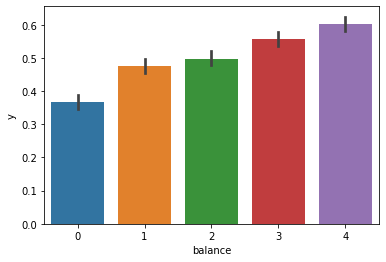

In [758]:
sns.barplot(x="balance", y="y", data=train)

### Colonne loan

In [759]:
train['loan'].value_counts()

no     9188
yes    1390
Name: loan, dtype: int64

In [760]:
train['loan']=train['loan'].map({'no':0,"yes":1})

### Colonne poutcome

In [761]:
train['poutcome'].value_counts()

unknown    7830
failure    1174
success    1052
other       522
Name: poutcome, dtype: int64

In [762]:
train['poutcome']=train['poutcome'].map({'unknown':0,"failure":1,'other':2,"success":3})
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,24,1,0,0,0,1,1,1,unknown,16,may,300,1,-1,0,0,0
1,30,2,1,1,0,0,1,0,cellular,28,jul,377,4,-1,0,0,0
2,46,1,0,2,0,0,1,0,unknown,14,may,73,1,-1,0,0,0
3,45,5,0,2,0,4,0,0,unknown,16,jun,143,2,-1,0,0,0
4,21,1,1,0,0,4,0,0,cellular,27,may,156,4,99,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,78,6,0,1,0,3,0,0,telephone,17,nov,135,1,-1,0,0,1
10574,51,10,0,3,0,4,1,0,cellular,16,apr,251,2,266,3,2,1
10575,32,2,1,1,0,0,0,0,cellular,5,feb,550,4,-1,0,0,1
10576,27,7,1,1,0,2,0,0,cellular,6,aug,385,4,-1,0,0,1


### Colonnes à supprimer 

In [763]:
train.drop(['contact'], axis='columns', inplace=True)
train.drop(['day'], axis='columns', inplace=True)
train.drop(['month'], axis='columns', inplace=True)

In [764]:
train

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,24,1,0,0,0,1,1,1,300,1,-1,0,0,0
1,30,2,1,1,0,0,1,0,377,4,-1,0,0,0
2,46,1,0,2,0,0,1,0,73,1,-1,0,0,0
3,45,5,0,2,0,4,0,0,143,2,-1,0,0,0
4,21,1,1,0,0,4,0,0,156,4,99,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,78,6,0,1,0,3,0,0,135,1,-1,0,0,1
10574,51,10,0,3,0,4,1,0,251,2,266,3,2,1
10575,32,2,1,1,0,0,0,0,550,4,-1,0,0,1
10576,27,7,1,1,0,2,0,0,385,4,-1,0,0,1


In [765]:
predictors = train.drop(['y'], axis=1)
target = train["y"]

In [766]:
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

In [767]:
# Random Forest
cls=RandomForestClassifier(max_depth=12,n_estimators=300).fit(x_train,y_train)

cls.score(x_val,y_val)

0.8260869565217391

In [769]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val,cls.predict(x_val))

array([[822, 207],
       [161, 926]], dtype=int64)

In [771]:
import pickle
# save the model to disk
filename = 'cls_banking.pkl'
pickle.dump(cls, open(filename, 'wb'))